# Compute global annual anomalies

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import importlib
import my_functions as f
importlib.reload(f); # needed to load new changes in my_functions


## Find models where we have global annual means, but no anomalies:

In [4]:
model_mean_names = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/') if f.is_dir() and f.name !='.ipynb_checkpoints']
model_anom_names = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/') if f.is_dir() and f.name !='.ipynb_checkpoints']

no_anoms_yet = set(model_mean_names)-set(model_anom_names)
for model in no_anoms_yet:
    mean_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/' + model) if f.is_dir() and f.name !='.ipynb_checkpoints']
    print(model, ' ', mean_exp)
    
    

## Find models where we have some anomalies, but are missing some experiments/members

In [17]:
for model in model_anom_names:
    #print(model)
    mean_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/' + model) if f.is_dir() and f.name !='.ipynb_checkpoints']
    anom_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/' + model) if f.is_dir() and f.name !='.ipynb_checkpoints']
    diff = set(mean_exp) - set(anom_exp)
    if len(diff)>0:
        print(model, 'has no anomalies for', diff)
    other_exp = set(mean_exp) - diff
    for exp in other_exp: # do we have all members?
        # compare number of files in folders
        anom_exp_memberfiles = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/' + model + '/' + exp) if f.name !='.ipynb_checkpoints']
        anom_exp_members = [file.rsplit('_')[2] for file in anom_exp_memberfiles ]
        mean_exp_memberfiles = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/' + model + '/' + exp) if f.name !='.ipynb_checkpoints']
        mean_exp_members = [file.rsplit('_')[2] for file in mean_exp_memberfiles]
        diff_members = set(mean_exp_members) - set(anom_exp_members)
        if len(diff_members)>0:
            print('Anomalies not computed for members', diff_members, 'of', model, exp)

# NB: for piClim experiments we don't compute anomalies here


NorESM2-LM has no anomalies for {'piClim-control', 'piClim-histall', 'piClim-4xCO2'}
ACCESS-ESM1-5 has no anomalies for {'piClim-control', 'piClim-4xCO2'}
Anomalies not computed for members {'r2i1p1f1'} of ACCESS-ESM1-5 abrupt-4xCO2
Anomalies not computed for members {'r26i1p1f1', 'r14i1p1f1', 'r27i1p1f1', 'r22i1p1f1', 'r36i1p1f1', 'r7i1p1f1', 'r12i1p1f1', 'r35i1p1f1', 'r19i1p1f1', 'r11i1p1f1', 'r31i1p1f1', 'r37i1p1f1', 'r29i1p1f1', 'r15i1p1f1', 'r21i1p1f1', 'r20i1p1f1', 'r18i1p1f1', 'r40i1p1f1', 'r10i1p1f1', 'r6i1p1f1', 'r24i1p1f1', 'r32i1p1f1', 'r13i1p1f1', 'r9i1p1f1', 'r17i1p1f1', 'r25i1p1f1', 'r33i1p1f1', 'r8i1p1f1', 'r39i1p1f1', 'r34i1p1f1', 'r5i1p1f1', 'r23i1p1f1', 'r38i1p1f1', 'r28i1p1f1', 'r30i1p1f1', 'r4i1p1f1', 'r16i1p1f1'} of ACCESS-ESM1-5 historical
HadGEM3-GC31-LL has no anomalies for {'piClim-control', 'piClim-histall', 'piClim-4xCO2'}
CESM2 has no anomalies for {'piClim-control', 'piClim-4xCO2'}
NorCPM1 has no anomalies for {'historical'}
CESM2-WACCM has no anomalies for

## Choose model and experiment

In [30]:
#model = 'FGOALS-f3-L'
#model = 'GISS-E2-1-H'
#model = 'KIOST-ESM'
#model = 'GISS-E2-1-H'
#model = 'CIESM'
#model = 'KACE-1-0-G'
model = 'MIROC6'

#exp = 'piControl'
#exp = 'abrupt-4xCO2'
#exp = 'abrupt-2xCO2'
#exp = 'abrupt-0p5xCO2'
#exp = '1pctCO2'

#exp = 'historical'
exp = 'ssp119'
#exp = 'ssp126'
#exp = 'ssp245'
#exp = 'ssp370'
#exp = 'ssp585'

In [31]:
branch_time_file = '../Processed_data/Branch_times/' + model + '_branch_times.txt'
table = pd.read_table(branch_time_file,index_col=0, sep = ' ')
#pd.set_option('display.max_rows', None)
pd.set_option('display.min_rows', 15)
table

,model,exp,member,parent_experiment_id,parent_variant_id,branch_time_in_child,branch_time_in_parent,parent_time_units,branch_method
0,MIROC6,1pctCO2,r1i1p1f1,piControl,r1i1p1f1,0.0,0.0,days since 3200-1-1,standard
1,MIROC6,abrupt-0p5xCO2,r1i1p1f1,piControl,r1i1p1f1,0.0,0.0,days since 3200-1-1,standard
2,MIROC6,abrupt-2xCO2,r1i1p1f1,piControl,r1i1p1f1,0.0,0.0,days since 3200-1-1,standard
3,MIROC6,abrupt-4xCO2,r1i1p1f1,piControl,r1i1p1f1,0.0,0.0,days since 3200-1-1,standard
4,MIROC6,historical,r10i1p1f1,piControl,r1i1p1f1,0.0,98616.0,days since 3200-1-1,standard
5,MIROC6,historical,r1i1p1f1,piControl,r1i1p1f1,0.0,0.0,days since 3200-1-1,standard
6,MIROC6,historical,r2i1p1f1,piControl,r1i1p1f1,0.0,10958.0,days since 3200-1-1,standard
7,MIROC6,historical,r3i1p1f1,piControl,r1i1p1f1,0.0,21915.0,days since 3200-1-1,standard
8,MIROC6,historical,r4i1p1f1,piControl,r1i1p1f1,0.0,32873.0,days since 3200-1-1,standard
9,MIROC6,historical,r5i1p1f1,piControl,r1i1p1f1,0.0,43829.0,days since 3200-1-1,standard


piControl_start_year 3200
0.0
0
days difference: 0.0
differences not equal to 0 indicate wrong calendar assumptions or branch dates not equal to the start of a new year


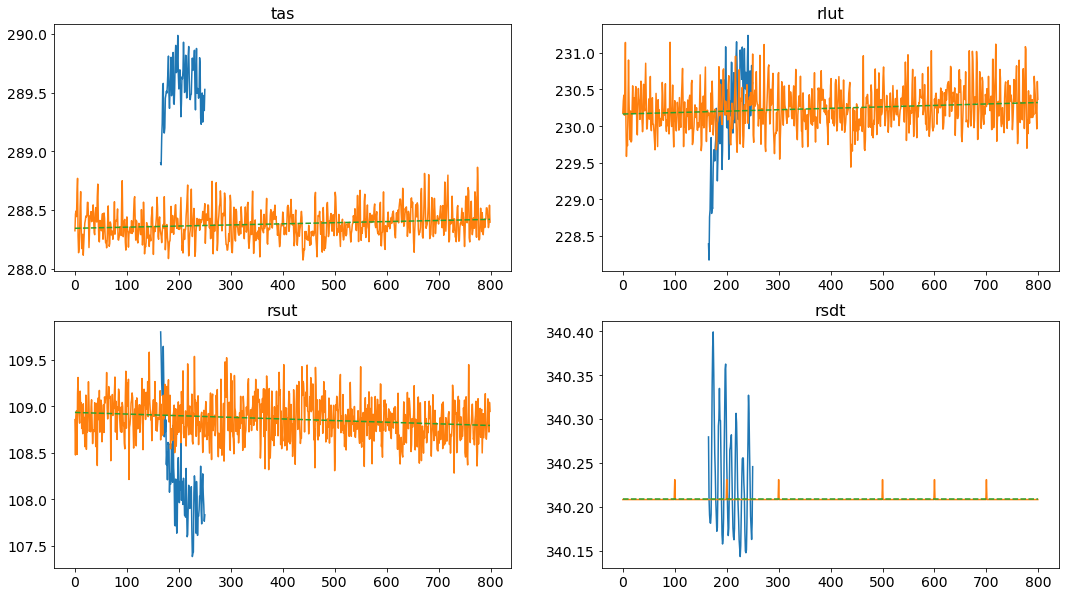

In [32]:
plot_absolute_values = True
plot_anomalies = False
save_results = True
#save_results = False

expgroup0 = ['piControl']
expgroup1 = ['abrupt-4xCO2', 'abrupt-2xCO2', 'abrupt-0p5xCO2', '1pctCO2']
expgroup2 = ['historical', 'ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

piControl_path = '../Processed_data/Global_annual_means/' + model + '/piControl/'
exp_path = '../Processed_data/Global_annual_means/' + model + '/' + exp + '/'

exptable = table.loc[table['exp'] == exp]
available_members = exptable['member'].values

for member in available_members:
    member_df = exptable.loc[exptable['member'] == member]

    # load exp data
    exp_filename = model + '_' + exp + '_' + member + '_means.txt'
    exp_data = pd.read_table(exp_path + exp_filename, index_col=0, sep = ',')
    
    if plot_absolute_values == True:
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [18,10]); axes = np.reshape(ax, 4)
    if plot_anomalies == True:
        fig, ax2 = plt.subplots(nrows = 2, ncols = 2, figsize = [18,10]); axes2 = np.reshape(ax2, 4)

    if exp in expgroup1 or exp in expgroup2:
        if exp in expgroup1 or exp == 'historical':
            branch_time_days = member_df['branch_time_in_parent'].values[0]
            piControl_member = member_df['parent_variant_id'].values[0] 
        elif exp in expgroup2: # then ssp. check branch for historical parent only
            # find historical parent member 
            parent_member = member_df['parent_variant_id'].values[0]
            parent_table = table.loc[table['exp'] == 'historical']
            parent_df = parent_table.loc[parent_table['member'] == parent_member]
            branch_time_days = parent_df['branch_time_in_parent'].values[0]
            piControl_member = parent_df['parent_variant_id'].values[0]
        
        # correct the info loaded above for some models/exps/members:
        if model in ['MPI-ESM1-2-HR', 'BCC-CSM2-MR', 'INM-CM5-0', 'MPI-ESM-1-2-HAM'] and exp in expgroup2:
            piControl_member = 'r1i1p1f1' # overwrite info from file, which seems to be wrong
        if model in ['NorESM2-LM'] and exp == 'ssp370':
            parent_member = member # overwrite info in file which is likely wrong
            parent_df = parent_table.loc[parent_table['member'] == parent_member]
            branch_time_days = parent_df['branch_time_in_parent'].values[0]
            piControl_member = parent_df['parent_variant_id'].values[0]
        if model in ['IPSL-CM6A-LR'] and exp == 'historical' and member == 'r32i1p1f1': 
            piControl_member = 'r1i1p1f1' # overwrite info saying that piControl member is also 'r32i1p1f1'
        if model in ['CNRM-CM6-1', 'CNRM-ESM2-1'] and exp in ['abrupt-4xCO2', '1pctCO2']:
            piControl_member = 'r1i1p1f2' # this is the only control run available
            # many CNRM-CM6-1 historical branch times are after the end of picontrol in , but I find no errata info about this. Maybe a later period of piControl is just not available
        if model in ['NESM3'] and exp == 'historical' and member == 'r3i1p1f1':
            piControl_member = 'r1i1p1f1' # this is the only control run available
        if model in ['CIESM']: #and exp in expgroup1:
            piControl_member = 'r1i1p1f1' # this is the only control run available
        
        # load piControl values. 
        piControl_filename = model + '_piControl_' + piControl_member + '_means.txt'
        piControl_data = pd.read_table(piControl_path + piControl_filename, index_col=0, sep = ',')
        
        piControl_start_year = int(table.loc[table['parent_experiment_id'] == 'piControl']['parent_time_units'][0][11:15]) # wrong for several models. Sometimes the branch_time_in_parent is not 0, and makes the startyear correct.
        print('piControl_start_year', piControl_start_year)
        days_table = np.append([0],np.cumsum(f.dpy(model,piControl_start_year,piControl_start_year+1500)))    
        # find index of element closest to branch_time_days
        year_since_piControl_start = (np.abs(days_table - branch_time_days)).argmin()
        if model in ['BCC-CSM2-MR', 'BCC-ESM1'] and exp in expgroup2: # models with branch time given in years instead of days
            year_since_piControl_start = int(branch_time_days - piControl_start_year)
            print('year_since_piControl_start is', year_since_piControl_start)
        elif model in ['CAMS-CSM1-0']: # branch times given in years instead of days for all experiments except piControl
            piControl_start_year = 2900
            year_since_piControl_start = int(branch_time_days - piControl_start_year)
            print('year_since_piControl_start is', year_since_piControl_start)
        elif model in ['NorESM2-LM']:
            piControl_start_year = 1600
            if exp in expgroup1:
                year_since_piControl_start = 0 # because 4xCO2, 1pctCO2 branch time is the same as piControl branch time
            elif exp in expgroup2: # measure branch time relative to r1 member
                if member == 'r1i1p1f1':
                    year_since_piControl_start = 0
                else:
                    days_table = np.append([0],np.cumsum(f.dpy(model,piControl_start_year,piControl_start_year+500)))
                    branch_time_days = branch_time_days - 430335
                    # find index of element closest to branch_time_days
                    year_since_piControl_start = (np.abs(days_table - branch_time_days)).argmin()
                    print(member)
                    print(year_since_piControl_start)
                    print('days difference:', days_table[year_since_piControl_start] - branch_time_days)
        elif model in ['NorESM2-MM']:
            piControl_start_year = 1200
            year_since_piControl_start = 0 # because 4xCO2 branch time is the same as piControl branch time
        elif model in ['UKESM1-0-LL']:
            piControl_start_year = 1960
            #if exp in expgroup1:
            #    branch_time_days = branch_time_days - 39600   
            #    year_since_piControl_start = 0
            if exp in expgroup1 or exp in expgroup2:
                days_table = np.append([0],np.cumsum(f.dpy(model,piControl_start_year,piControl_start_year+1000)))
                branch_time_days = branch_time_days - 39600
                # find index of element closest to branch_time_days
                year_since_piControl_start = (np.abs(days_table - branch_time_days)).argmin()
                print(member)
                print(year_since_piControl_start)
                print('days difference:', days_table[year_since_piControl_start] - branch_time_days)
        elif model in ['GFDL-CM4']:
            piControl_start_year = 151 # found from manual check. Branch info is clearly wrong, since it lists different time units for piControl
            if exp == 'abrupt-4xCO2':
                year_since_piControl_start = 0
            elif exp in expgroup2:
                year_since_piControl_start = 100 # probably?
        elif model == 'CanESM5': 
            if exp in expgroup1:
                if exp == '1pctCO2':
                    if int(member[-3]) == 1:
                        branch_time_days = branch_time_days - 1223115 
                    elif int(member[-3]) == 2:
                        branch_time_days = branch_time_days - 1350500
                    year_since_piControl_start = (np.abs(days_table - branch_time_days)).argmin()
                    print(year_since_piControl_start)
                    print('days difference:', days_table[year_since_piControl_start] - branch_time_days)
                else:
                    year_since_piControl_start = 0 # because 4xCO2 branch time is the same as piControl branch time
            elif exp in expgroup2: # measure branch time relative to r1 member
                piControl_start_year = 5201
                days_table = np.append([0],np.cumsum(f.dpy(model,piControl_start_year,piControl_start_year+2000)))  
                if int(member[-3]) == 1:
                    branch_time_days = branch_time_days - 1223115 
                elif int(member[-3]) == 2:
                    branch_time_days = branch_time_days - 1350500
                # find index of element closest to branch_time_days
                year_since_piControl_start = (np.abs(days_table - branch_time_days)).argmin()
                print(member)
                print(year_since_piControl_start)
                print('days difference:', days_table[year_since_piControl_start] - branch_time_days)
        elif model in ['CanESM5-CanOE']:
            if exp in expgroup1:
                year_since_piControl_start = 0 # because 4xCO2 branch time is the same as piControl branch time
            #elif exp == 'historical':
            elif exp in expgroup2:
                piControl_start_year = 5550
                days_table = np.append([0],np.cumsum(f.dpy(model,piControl_start_year,piControl_start_year+2000)))  
                branch_time_days = branch_time_days - 1350500
                print('branch_time_days', branch_time_days)
                # find index of element closest to branch_time_days
                year_since_piControl_start = (np.abs(days_table - branch_time_days)).argmin()
                print('year_since_piControl_start', year_since_piControl_start)
        elif model in ['TaiESM1']:
            if exp == '1pctCO2':
                year_since_piControl_start = 701 - 201
            elif exp == 'abrupt-4xCO2':
                year_since_piControl_start = 701 - 201 # if we choose to trust info from branch method rather than branch_time_in_parent. This info seems to be the most correct for other experiments
            elif exp == 'historical':
                year_since_piControl_start = 671 - 201
        elif model in ['EC-Earth3-Veg-LR']:
            if exp in expgroup2:
                branch_time_days = branch_time_days - 164359
                year_since_piControl_start = (np.abs(days_table - branch_time_days)).argmin()
                print('year_since_piControl_start', year_since_piControl_start)
        elif model in ['KIOST-ESM']:
            branch_time_days = branch_time_days - 306445
            year_since_piControl_start = (np.abs(days_table - branch_time_days)).argmin()
            print('year_since_piControl_start', year_since_piControl_start)
        else:
            print(branch_time_days)
            print(days_table[year_since_piControl_start])
            print('days difference:', days_table[year_since_piControl_start] - branch_time_days)
            print('differences not equal to 0 indicate wrong calendar assumptions or branch dates not equal to the start of a new year')
        
    for (i,var) in enumerate(['tas', 'rlut', 'rsut', 'rsdt']):
        ydata = exp_data[var]; 
        # remove possible nan values?
        exp_len = len(exp_data[var])
        if exp in expgroup0:
            # then just subtract a linear trend from all values
            y = exp_data[var]; 
            y = y[np.isnan(y) == False] # needed for some models with several piControl members. 
            # Saved data should be manually checked if different variables exist for different periods
            # because this code makes them all to start at time 0.
            x = np.arange(len(y))
            datarange = np.arange(len(y))
        elif exp in expgroup1:
            y = piControl_data[var] # use all piControl years to determine trend
            y = y[np.isnan(y) == False]
            x = np.arange(len(y))
            #y = piControl_data[var][year_since_piControl_start:(year_since_piControl_start+exp_len)] # Use only years corresponding to exp years
            #x = np.arange(exp_len)
            datarange = year_since_piControl_start + np.arange(exp_len)
        elif exp in expgroup2:
            #x = np.arange(251) # number of years in interval (1850 - 2100)
            y = piControl_data[var] # use all piControl years to determine trend
            y = y[np.isnan(y) == False]
            x = np.arange(len(y))
            #y = piControl_data[var][year_since_piControl_start:(year_since_piControl_start+251)] # Use historical + ssp years (1850 - 2100)
            if exp == 'historical':
                datarange = year_since_piControl_start + np.arange(165)
            else:
                datarange = year_since_piControl_start + np.arange(165,251)
                if model in ['CIESM'] and exp == 'ssp585':
                    ydata = ydata[np.isnan(ydata) == False] # because of an error in the time coordinate of rsdt
                ydata = ydata[:86] # if data exists beyond year 2100, this code excludes them
                if model == 'CAMS-CSM1-0': # stops in 2099
                    datarange = year_since_piControl_start + np.arange(165,250)
                elif model in ['BCC-ESM1', 'MPI-ESM-1-2-HAM']: # ssp370 has only 40 years of data
                    datarange = year_since_piControl_start + np.arange(165,206)


        #if len(y) == len(x):
        #    p1 = np.polyfit(x,y,1)
        #elif len(y) < len(x):
        #    p1 = np.polyfit(x[:len(y)],y,1) # make a fit from the data we have available
        #lintrend = np.polyval(p1,x)
        p1 = np.polyfit(x,y,1)
        lintrend = np.polyval(p1,np.arange(max(len(x), datarange[-1]+1))) # make trend longer than x, in case exp ends later than piControl  
        if exp in expgroup0:
            annual_anomalies = y - lintrend[datarange]
        else:
            annual_anomalies = ydata - lintrend[datarange]
        if var == 'tas':
            # create dataframe for storing anomalies
            exp_anomalies = pd.DataFrame(annual_anomalies.values, columns = [var])
        else:
            df_col = pd.DataFrame(annual_anomalies.values, columns = [var])
            exp_anomalies = pd.merge(exp_anomalies, df_col, left_index=True, right_index=True, how='outer')

        if plot_absolute_values == True: # plot abolute values and trends
            if exp in expgroup0:
                axes[i].plot(datarange, y) # exp data
            else:
                axes[i].plot(datarange, ydata) # exp data
            #axes[i].plot(x[:len(y)], y)
            axes[i].plot(x, y) # piControl
            axes[i].plot(np.arange(len(lintrend)), lintrend, '--') # piControl trend
            #axes[i].plot(x, lintrend[:len(x)]) # piControl trend
            axes[i].set_title(var, fontsize = 16)
            axes[i].tick_params(axis='both',labelsize=14)
        if plot_anomalies == True: # plot anomalies for visual check:
            axes2[i].plot(x, exp_anomalies[var])
            axes2[i].set_title(x, var, fontsize = 16)
            axes2[i].tick_params(axis='both',labelsize=14) 

    if save_results == True:
        filename = model + '_' + exp + '_' + member + '_anomalies.txt'
        filepath = os.path.join('../Processed_data/Global_annual_anomalies/', model, exp)
        if os.path.isdir(filepath) == False:
            os.makedirs(filepath)
        else:
            if member == available_members[0]:
                print('path already exists. Make sure no data in it are written over erroneously')
        exp_anomalies.to_csv(filepath + '/' + filename)
        
        

In [33]:
exp_anomalies

,tas,rlut,rsut,rsdt
0,0.541540,-1.805683,0.895284,0.071193
1,0.524509,-2.026821,0.646433,0.001311
2,0.755202,-1.438597,0.341864,-0.017793
3,0.876455,-1.341616,0.211772,-0.026370
4,1.201535,-0.868135,0.210105,-0.027131
5,1.217702,-0.355416,0.740662,-0.016851
6,0.800297,-1.390982,0.357576,0.052961
...,...,...,...,...
79,1.097117,0.304243,-1.156806,0.055186
80,1.128961,0.540983,-0.764105,0.020111
